<a href="https://colab.research.google.com/github/conceptbin/DA_Notebooks/blob/master/Pivot_group_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grouping in pandas

In [58]:
import pandas as pd
import seaborn as sns

First, load the data.

In [59]:
# File path
file = r'https://github.com/conceptbin/DA_Notebooks/raw/master/pandas-intro/data/2023-08-metropolitan-street.csv'
# Create dataframe (df)
df = pd.read_csv(file)

Create a Local_Authority column from LSOA_name.

In [60]:
#Create a new column:
df['Local_Authority'] = df['LSOA name'].str.slice(0, -5)

# Group and aggregate
Functions: `groupby()`. Group by Local Authority, count total number of crime reports for each.

In [61]:
df.keys()

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context', 'Local_Authority'],
      dtype='object')

In [62]:
df_grouped = df.groupby(['Local_Authority'])['Crime type'].agg('count').reset_index()

In [63]:
df_grouped

,Local_Authority,Crime type
0,Arun,4
1,Ashford,2
2,Barking and Dagenham,2138
3,Barnet,2851
4,Basildon,5
...,...,...
164,Woking,1
165,Wokingham,3
166,Worthing,2
167,Wrexham,1


In [64]:
df_grouped.sort_values(by=['Crime type'], ascending=False)[:32]

,Local_Authority,Crime type
159,Westminster,7695
96,Newham,4002
146,Tower Hamlets,3959
26,Camden,3920
125,Southwark,3786
78,Lambeth,3739
37,Croydon,3598
43,Ealing,3407
15,Brent,3397
59,Hackney,3252


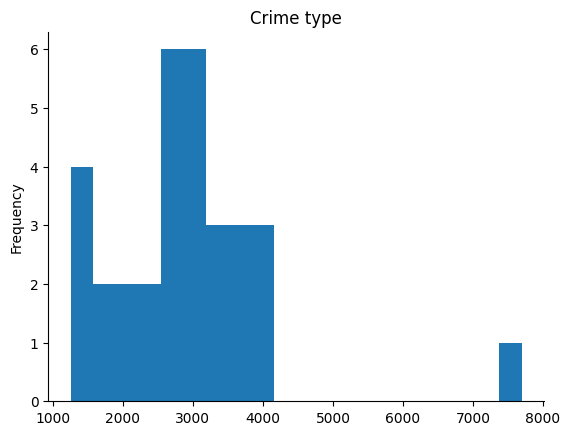

In [65]:
from matplotlib import pyplot as plt
_df_0['Crime type'].plot(kind='hist', bins=20, title='Crime type')
plt.gca().spines[['top', 'right',]].set_visible(False)

Grouping, version 2

In [66]:
df.keys()

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context', 'Local_Authority'],
      dtype='object')

In [67]:
df_grouped2 = df.groupby(['Local_Authority', 'Crime type'])['LSOA name'].agg('count').reset_index()

In [75]:
la_keywords = 'Wandsworth|Hammersmith|Westminster'
df_wand = df_grouped2[df_grouped2['Local_Authority'].str.contains(la_keywords)]

In [76]:
df_wand

,Local_Authority,Crime type,LSOA name
261,Hammersmith and Fulham,Anti-social behaviour,468
262,Hammersmith and Fulham,Bicycle theft,89
263,Hammersmith and Fulham,Burglary,128
264,Hammersmith and Fulham,Criminal damage and arson,111
265,Hammersmith and Fulham,Drugs,105
266,Hammersmith and Fulham,Other crime,15
267,Hammersmith and Fulham,Other theft,243
268,Hammersmith and Fulham,Possession of weapons,4
269,Hammersmith and Fulham,Public order,129
270,Hammersmith and Fulham,Robbery,39


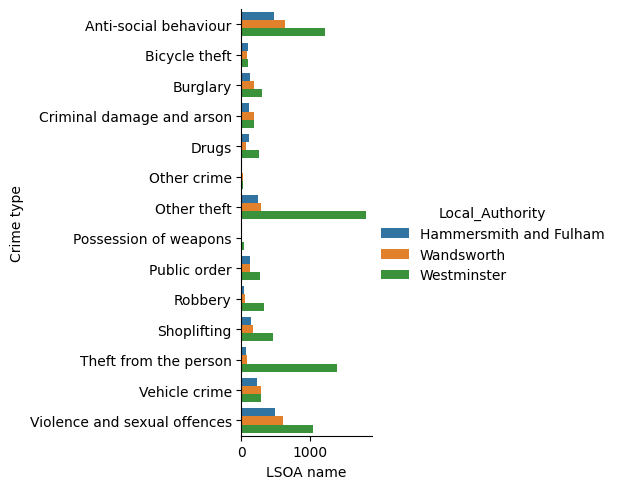

In [79]:
sns.catplot(data=df_wand, kind='bar', y='Crime type', x= 'LSOA name', hue='Local_Authority')